In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Cars_Data.csv')

In [3]:
df.head()

,car_company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df['enginesize'].min


<bound method NDFrame._add_numeric_operations.<locals>.min of 0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64>

In [4]:
df.columns

Index(['car_company', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<Axes: xlabel='stroke', ylabel='price'>

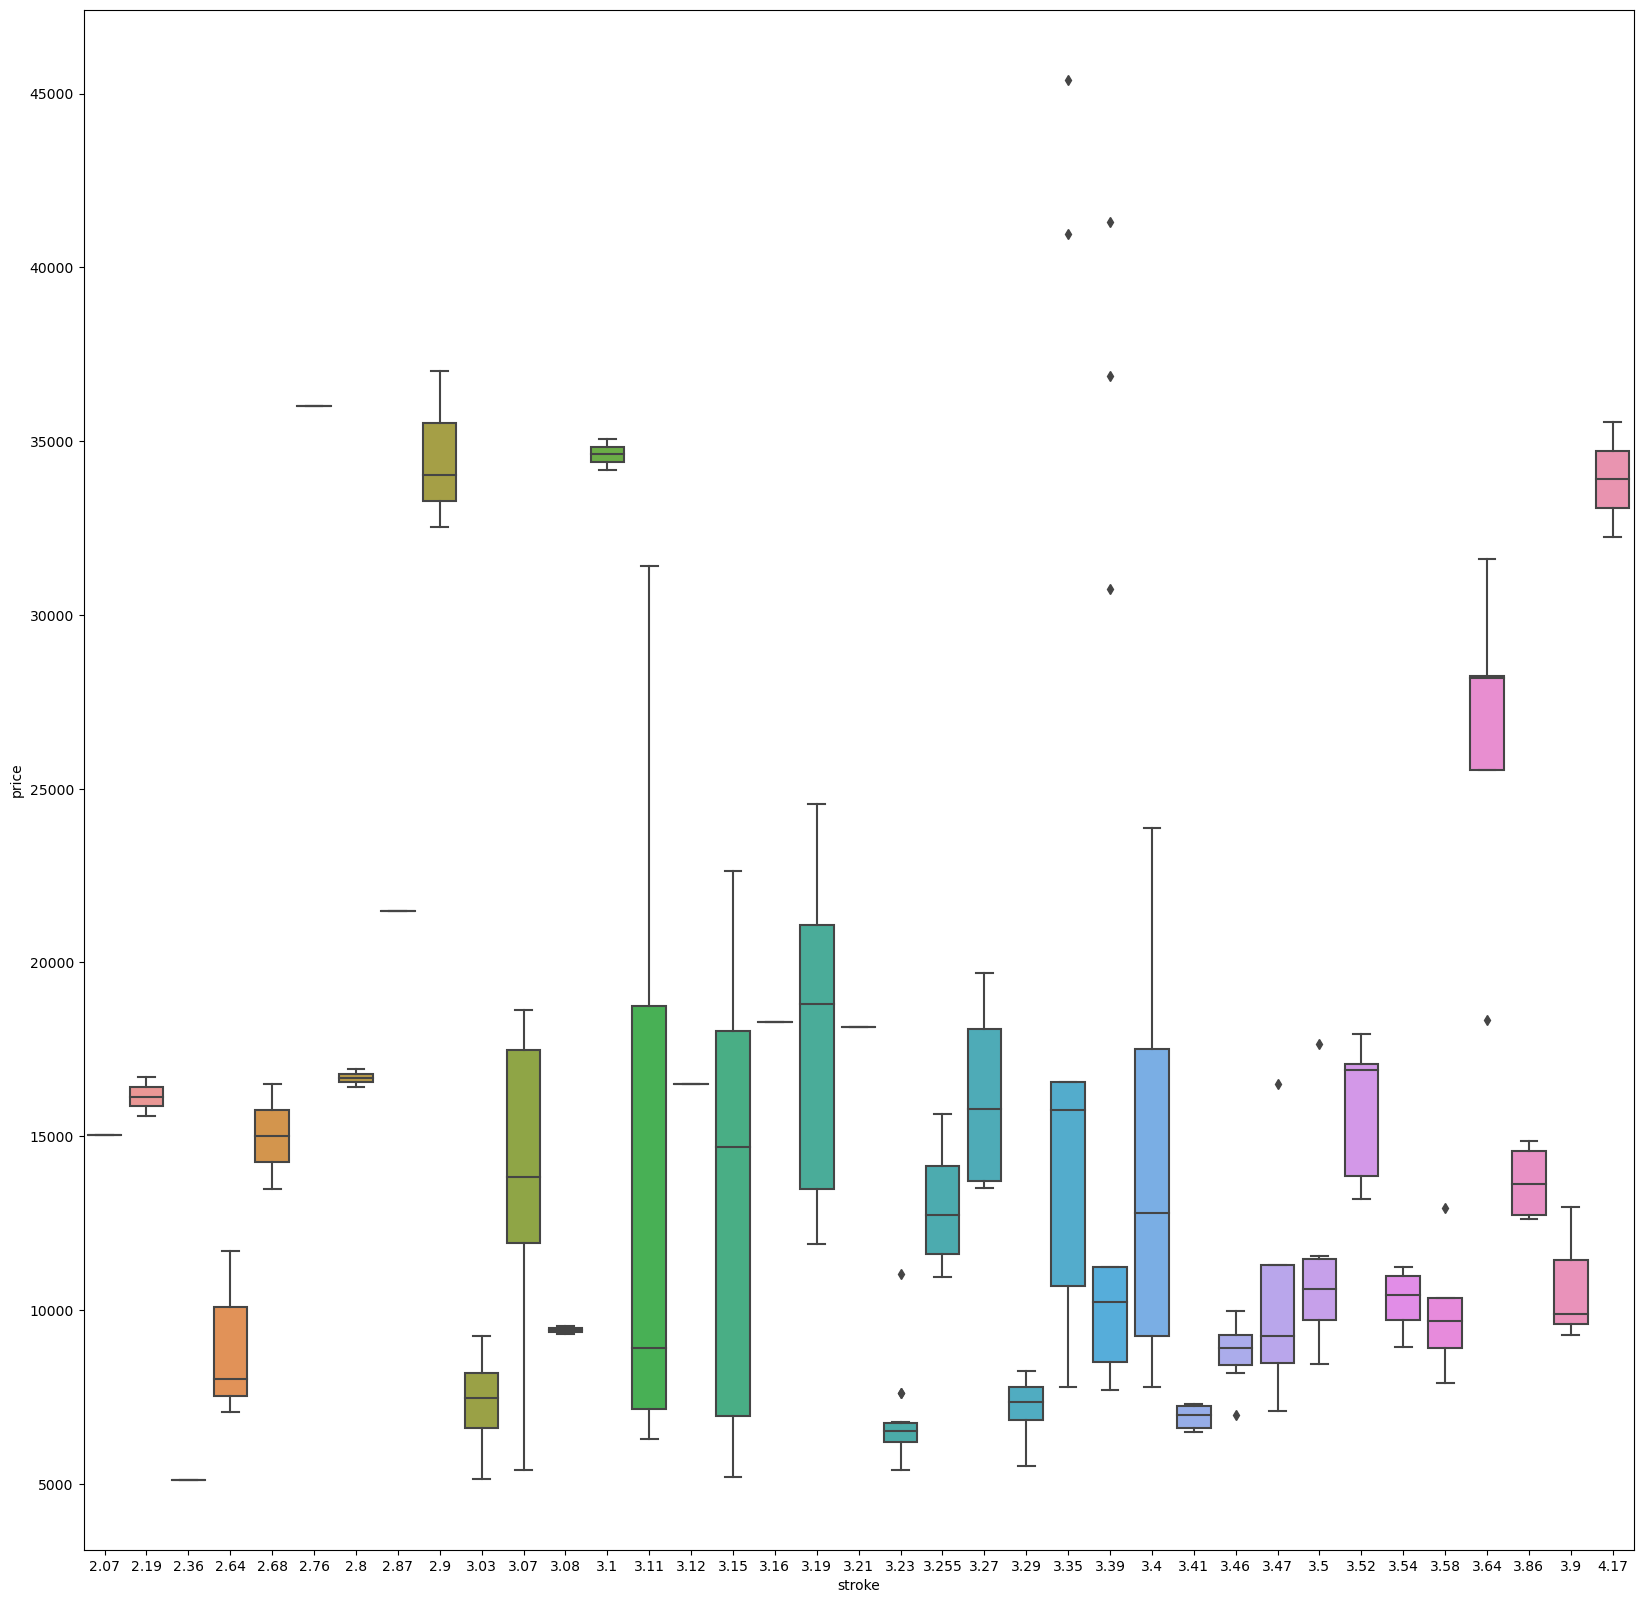

In [5]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['stroke'],y=df['price'])

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['car_company']=le.fit_transform(df['car_company'])
df['fueltype']=le.fit_transform(df['fueltype'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['carbody']=le.fit_transform(df['carbody'])
df['drivewheel']=le.fit_transform(df['drivewheel'])
df['enginelocation']=le.fit_transform(df['enginelocation'])
df['enginetype']=le.fit_transform(df['enginetype'])
df['fuelsystem']=le.fit_transform(df['fuelsystem'])

In [7]:
df.head()

,car_company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,3,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,2,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,2,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
X=df[['car_company', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
Y=df[['price']]

In [17]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [9]:
xtr,xts,ytr,yts=train_test_split(X,Y,test_size=0.1,random_state=42)

In [10]:
linear_model=LinearRegression()
linear_model.fit(xtr,ytr)

LinearRegression()

In [11]:
pred_tr=linear_model.predict(xtr)

In [12]:
metrics.r2_score(ytr,pred_tr)

0.8921527703021926

Text(0, 0.5, 'Predicted Price')

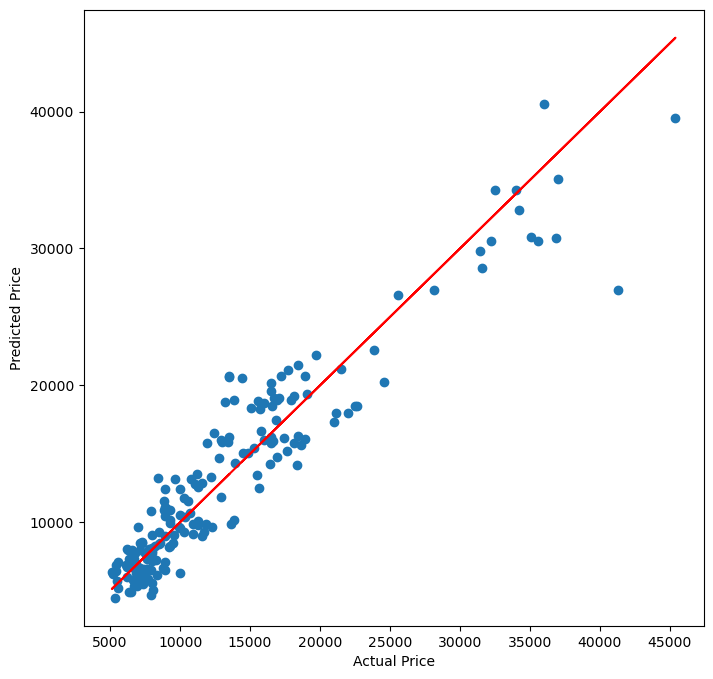

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(ytr,pred_tr)
plt.plot(ytr,ytr,'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [14]:
pred_ts=linear_model.predict(xts)

In [15]:
metrics.r2_score(yts,pred_ts)

0.9531379751726347

Text(0, 0.5, 'Predicted Price')

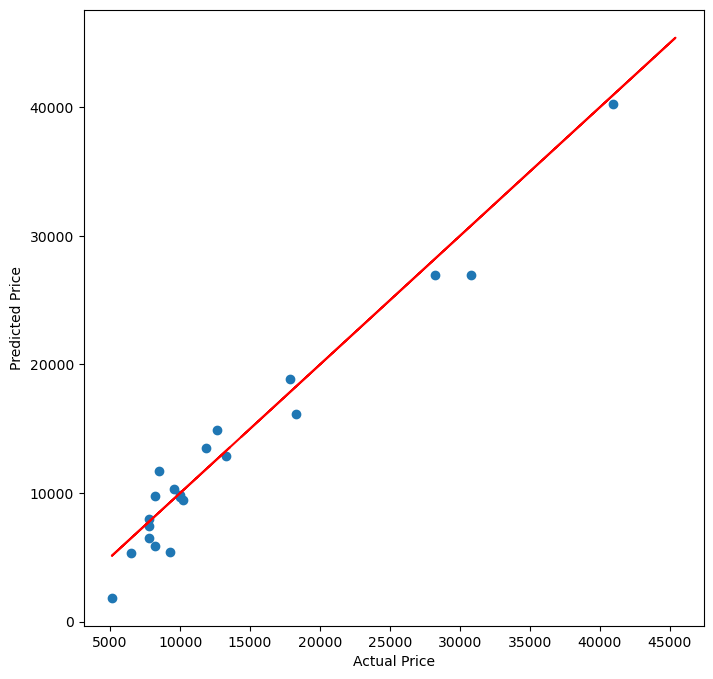

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(yts,pred_ts)
plt.plot(ytr,ytr,'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [17]:
import joblib

In [19]:
joblib.dump(linear_model,'car-price-predictor')

['car-price-predictor']